In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
from helper import convert_to_time

In [251]:
np.random.seed(1)

# Default values
filename = 'TOTAL_KSI_6386614326836635957.csv'
input_directory = '../data/'
output_directory = './output/'

ksi_df = pd.read_csv(f'{input_directory}{filename}')


In [252]:
print(ksi_df.describe())


           OBJECTID         INDEX        ACCNUM          TIME      LATITUDE  \
count  18957.000000  1.895700e+04  1.402700e+04  18957.000000  18957.000000   
mean    9479.000000  3.994181e+07  5.576714e+08   1364.956428     43.710299   
std     5472.558862  3.749731e+07  1.180026e+09    631.310388      0.056294   
min        1.000000  3.363207e+06  2.530100e+04      0.000000     43.589678   
25%     4740.000000  5.408154e+06  1.034561e+06    924.000000     43.661727   
50%     9479.000000  7.820656e+06  1.220029e+06   1450.000000     43.702346   
75%    14218.000000  8.092292e+07  1.386958e+06   1852.000000     43.755945   
max    18957.000000  8.180752e+07  4.008024e+09   2359.000000     43.855445   

          LONGITUDE    FATAL_NO              x             y  
count  18957.000000  870.000000   18957.000000  1.895700e+04  
mean     -79.396490   28.752874  629181.568576  4.840951e+06  
std        0.104484   17.657001    8364.337712  6.324585e+03  
min      -79.638390    1.000000  609

In [253]:
print(ksi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND           189

In [254]:
print(ksi_df.isnull().sum())

OBJECTID                 0
INDEX                    0
ACCNUM                4930
DATE                     0
TIME                     0
STREET1                  0
STREET2               1706
OFFSET               15137
ROAD_CLASS             486
DISTRICT               229
LATITUDE                 0
LONGITUDE                0
ACCLOC                5456
TRAFFCTL                75
VISIBILITY              24
LIGHT                    4
RDSFCOND                29
ACCLASS                  1
IMPACTYPE               27
INVTYPE                 16
INVAGE                   0
INJURY                8897
FATAL_NO             18087
INITDIR               5277
VEHTYPE               3487
MANOEUVER             7953
DRIVACT               9289
DRIVCOND              9291
PEDTYPE              15728
PEDACT               15730
PEDCOND              15711
CYCLISTYPE           18152
CYCACT               18155
CYCCOND              18157
PEDESTRIAN           11269
CYCLIST              16971
AUTOMOBILE            1727
M

In [255]:
ksi_df.head(3)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3389067,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
1,2,3389068,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
2,3,3389069,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06


In [256]:
dropped_fields = [
    'INDEX',
    'ACCNUM',
    'OBJECTID',
    'STREET1',
    'STREET2',
    'DISTRICT',
    'LATITUDE',
    'LONGITUDE',
    'ACCLOC',
    'INVTYPE',
    'INVAGE',
    'INJURY',
    'OFFSET',
    'FATAL_NO',
    #'VEHTYPE',
    'INITDIR',
    'MANOEUVER',
    'DRIVACT',
    'DRIVCOND',
    'PEDTYPE',
    'PEDACT',
    'PEDCOND',
    'CYCLISTYPE',
    'CYCACT',
    'CYCCOND',
    'HOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140',
    'DIVISION',
    'x',
    'y',
]

In [257]:
categorical_columns = ksi_df.select_dtypes(include=[object, 'category']).columns.tolist()
numerical_columns = ksi_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Change all values to UpperCase
ksi_df[categorical_columns] = ksi_df[categorical_columns].apply(lambda col: col.str.upper())

#ksi_df.drop(['TIME'], inplace=True)


# Fields to be dropped depending on the dataset
#ksi_df.drop(dropped_fields, axis=1, inplace=True)

# Team agreed to drop the entry with missing label
ksi_df.dropna(subset=['ACCLASS'], inplace=True)

# Dropped ACCLASS with Property Damage : 10 Entries in the dataset 
#ksi_df.drop(ksi_df[ksi_df['ACCLASS'] == 'PROPERTY DAMAGE O'].index, inplace=True)
ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE']).dt.month # Update date to per month
#ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE'], format='%Y-%m')
ksi_df['TIME'] = ksi_df['TIME'].apply(convert_to_time)
ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour # Update time to per hour
ksi_df['ROAD_CLASS'] = ksi_df['ROAD_CLASS'].str.replace(r'MAJOR ARTERIAL ', 'MAJOR ARTERIAL', regex=False) # Update the incorrect Road Class with space

# Pedestrian and Passenger falls under 'Other' in INVTYPE
#df['VEHTYPE'] = np.where(((df['INVTYPE'] == 'Pedestrian') | (df['INVTYPE'] == 'Passenger')) & (df['VEHTYPE'] != '') , 'Other', df['INVTYPE'])

# Fill in empty fields for boolean columns
boolean_columns = [
    'PEDESTRIAN',
    'CYCLIST',
    'AUTOMOBILE',
    'MOTORCYCLE',
    'TRUCK',
    'TRSN_CITY_VEH',
    'EMERG_VEH',
    'PASSENGER',
    'SPEEDING',
    'AG_DRIV',
    'REDLIGHT',
    'ALCOHOL',
    'DISABILITY'
]
unknown_column = [
'VEHTYPE',
'TRAFFCTL'
]

other_column =  [
    'ROAD_CLASS',
    'VISIBILITY',
    'LIGHT',
    'RDSFCOND',
    'IMPACTYPE'
]

ksi_df[unknown_column] = ksi_df[unknown_column].fillna('Unknown')
ksi_df[other_column] = ksi_df[other_column].fillna('Other')
ksi_df[boolean_columns] = ksi_df[boolean_columns].fillna('No')

/var/folders/gg/llfmzrv17klb_smsmrvhnkzc0000gn/T/ipykernel_97171/667076471.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour # Update time to per hour


Transformed feature matrix shape: (14026, 20)
Indices of selected features: [ 0  2  3  4  5  9 13 14 16 18 19 21 24 25 41 42 43 44 46 47]
Mutual Information scores for all features: [0.22293627 0.00030899 0.00548312 0.06947905 0.11887962 0.02253343
 0.0046666  0.00477683 0.00454514 0.00709527 0.0045244  0.
 0.00072538 0.0125905  0.0096911  0.00186415 0.12248483 0.00129671
 0.01107097 0.00512424 0.00487607 0.00735922 0.00362326 0.00439684
 0.00780673 0.00601939 0.00475883 0.         0.00438478 0.00187906
 0.00269991 0.0027858  0.00276982 0.00206164 0.00041192 0.
 0.00416496 0.00480183 0.00100668 0.         0.         0.02711078
 0.0238401  0.02662208 0.02354187 0.00286301 0.20005656 0.18870572]


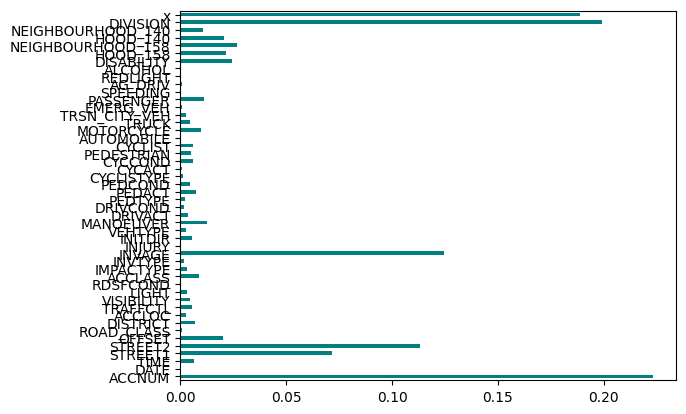

In [ ]:
from sklearn.feature_selection import mutual_info_classif  
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from matplotlib.pyplot import figure

features = ksi_df.drop(columns=['ACCLASS'], axis=1)
target = ksi_df['ACCLASS']

# Instantiate SelectKBest with the chi2 scoring function and select top 20 features
k_value = 20
selector = SelectKBest(score_func=mutual_info_classif, k=k_value)

# Fit SelectKBest to the data and transform the feature matrix
X_new = selector.fit_transform(features, target)

# Print the shape of the transformed feature matrix
print(f"Transformed feature matrix shape: {X_new.shape}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_feature_indices}")

# Get the chi-squared scores for each feature
mi_scores = selector.scores_
print(f"Mutual Information scores for all features: {mi_scores}")


figure(figsize=(8, 6), dpi=80)
importances = mutual_info_classif(features, target)
feat_importances = pd.Series(importances, ksi_df.columns[0:len(ksi_df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()
#mi_scores = mutual_info_classif(features, target)  
#print("Mutual Information Scores: ", mi_scores)

In [277]:
# Check for variance
from sklearn.feature_selection import VarianceThreshold

# Set the threshold (e.g., 0.1 for this example)
selector = VarianceThreshold(threshold=0.1)

# Fit the selector to your data
selector.fit(features)

# Get the variances of each feature
variances = selector.variances_

# Identify features with low variance
low_variance_features = features.columns[selector.variances_ <= 0.5]

# Print the feature variances
variances

# Print the features with low variance
low_variance_features

Index(['CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

In [258]:
from sklearn.preprocessing import LabelEncoder

# Binary mapping
binary_mapping = {'YES': 1, 'NO': 0}
target_mapping = {'FATAL': 1, 'NON-FATAL INJURY': 0, 'PROPERTY DAMAGE O': 2}
column_binary = [
    'PEDESTRIAN',
    'CYCLIST',
    'AUTOMOBILE',
    'MOTORCYCLE',
    'TRUCK',
    'TRSN_CITY_VEH',
    'EMERG_VEH',
    'PASSENGER',
    'SPEEDING',
    'AG_DRIV',
    'REDLIGHT',
    'ALCOHOL',
    'DISABILITY'
]
column_le = [
    'DATE',
    'ROAD_CLASS',
    'TRAFFCTL',
    'VISIBILITY',
    'LIGHT',
    'RDSFCOND',
    'IMPACTYPE',
    'VEHTYPE',
    'NEIGHBOURHOOD_158',
    'STREET1',
    'STREET2',
    'OFFSET',
    'DISTRICT',
    'ACCLOC',
    'INVTYPE',
    'INVAGE',
    'INJURY',
    'INITDIR',
    'MANOEUVER',
    'DRIVACT',
    'DRIVCOND',
    'PEDTYPE',
    'PEDACT',
    'PEDCOND',
    'CYCLISTYPE',
    'CYCACT',
    'CYCCOND',
    'HOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140',
    'DIVISION'
]

# Apply binary mapping using .loc
for column in column_binary:
    ksi_df[column] = ksi_df[column].map(lambda x: binary_mapping[x.upper()])

ksi_df['ACCLASS'] = ksi_df['ACCLASS'].replace(target_mapping)

le = LabelEncoder()

for column in column_le:
    ksi_df[column] = le.fit_transform(ksi_df
    [column])

/var/folders/gg/llfmzrv17klb_smsmrvhnkzc0000gn/T/ipykernel_97171/2136588574.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ksi_df['ACCLASS'] = ksi_df['ACCLASS'].replace(target_mapping)


In [259]:
ksi_df['ACCLASS']
ksi_df['ACCLASS'] = ksi_df['ACCLASS'].astype(int)


In [260]:
'''
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(ksi_df, y=column, hue='ACCLASS')
    #sns.swarmplot(ksi_df, x=column, hue='ACCLASS')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xscale('log')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

'''

"\nfor column in categorical_columns:\n    plt.figure(figsize=(8, 6))\n    sns.countplot(ksi_df, y=column, hue='ACCLASS')\n    #sns.swarmplot(ksi_df, x=column, hue='ACCLASS')\n    plt.title(f'Count of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Count')\n    plt.xscale('log')\n    #plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n\n"

In [262]:
ksi_df.dropna(subset=['ACCNUM'], inplace=True)
ksi_df.drop(['FATAL_NO'], axis=1, inplace=True)
ksi_df.drop(['OBJECTID'], axis=1, inplace=True)
ksi_df.drop(['INDEX'], axis=1, inplace=True)
ksi_df.drop(['LATITUDE'], axis=1, inplace=True)
ksi_df.drop(['LONGITUDE'], axis=1, inplace=True)
ksi_df.dropna(how='any', inplace=True)


features = ksi_df.drop(columns=['ACCLASS'], axis=1)
target = ksi_df['ACCLASS']

print(ksi_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14026 entries, 0 to 18956
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCNUM             14026 non-null  float64
 1   DATE               14026 non-null  int64  
 2   TIME               14026 non-null  int32  
 3   STREET1            14026 non-null  int64  
 4   STREET2            14026 non-null  int64  
 5   OFFSET             14026 non-null  int64  
 6   ROAD_CLASS         14026 non-null  int64  
 7   DISTRICT           14026 non-null  int64  
 8   ACCLOC             14026 non-null  int64  
 9   TRAFFCTL           14026 non-null  int64  
 10  VISIBILITY         14026 non-null  int64  
 11  LIGHT              14026 non-null  int64  
 12  RDSFCOND           14026 non-null  int64  
 13  ACCLASS            14026 non-null  int64  
 14  IMPACTYPE          14026 non-null  int64  
 15  INVTYPE            14026 non-null  int64  
 16  INVAGE             14026 no

In [263]:
ksi_df.head(5)

,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,TRAFFCTL,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
1,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
2,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
3,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
4,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06


In [264]:
ksi_df.shape

(14026, 49)

In [265]:
features.head(5)

,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,TRAFFCTL,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
1,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
2,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
3,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06
4,893184.0,0,2,1806,1759,490,5,3,2,0,...,0,1,0,120,151,97,135,15,635468.3685,4.839881e+06


In [266]:
ksi_df.isnull().sum()

ACCNUM               0
DATE                 0
TIME                 0
STREET1              0
STREET2              0
OFFSET               0
ROAD_CLASS           0
DISTRICT             0
ACCLOC               0
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            0
INVTYPE              0
INVAGE               0
INJURY               0
INITDIR              0
VEHTYPE              0
MANOEUVER            0
DRIVACT              0
DRIVCOND             0
PEDTYPE              0
PEDACT               0
PEDCOND              0
CYCLISTYPE           0
CYCACT               0
CYCCOND              0
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER            0
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
HOOD_158             0
NEIGHBOURHO

In [267]:
negative_counts = (ksi_df < 0).sum()
print(negative_counts)


ACCNUM               0
DATE                 0
TIME                 0
STREET1              0
STREET2              0
OFFSET               0
ROAD_CLASS           0
DISTRICT             0
ACCLOC               0
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            0
INVTYPE              0
INVAGE               0
INJURY               0
INITDIR              0
VEHTYPE              0
MANOEUVER            0
DRIVACT              0
DRIVCOND             0
PEDTYPE              0
PEDACT               0
PEDCOND              0
CYCLISTYPE           0
CYCACT               0
CYCCOND              0
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER            0
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
HOOD_158             0
NEIGHBOURHO

In [268]:
# Instantiate SelectKBest with the chi2 scoring function and select top 20 features
k_value = 20
selector = SelectKBest(score_func=chi2, k=k_value)

# Fit SelectKBest to the data and transform the feature matrix
X_new = selector.fit_transform(features, target)

# Print the shape of the transformed feature matrix
print(f"Transformed feature matrix shape: {X_new.shape}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_feature_indices}")

# Get the chi-squared scores for each feature
chi2_scores = selector.scores_
print(f"Chi-squared scores for all features: {chi2_scores}")

Transformed feature matrix shape: (14026, 20)
Indices of selected features: [ 0  2  3  4  5  9 10 12 14 16 18 28 32 36 41 42 43 44 46 47]
Chi-squared scores for all features: [6.32098023e+10 2.08431362e+01 7.43023874e+01 6.82117763e+03
 4.42957553e+03 5.85187228e+03 1.00089237e-01 3.07505690e+01
 2.56384682e+01 1.07374200e+02 1.10143654e+02 3.98122179e+01
 7.78616559e+01 6.33811203e+00 3.13208875e+02 5.98566782e+01
 6.29211524e+01 5.49644131e+00 2.00892156e+03 2.62208538e+01
 5.83155448e+01 1.56067773e+01 3.53095626e+01 2.79808788e+01
 1.11338262e-01 7.17364193e+00 8.75153261e+00 1.69501563e+00
 6.05845872e+01 5.89930041e+01 1.01472423e+01 1.30772413e+00
 1.81270799e+02 4.53157830e+01 1.10176227e+00 1.68601344e+01
 1.09251375e+02 1.09775017e+01 2.97372865e+00 1.25164017e+01
 4.83396899e-01 1.46554632e+02 2.73202069e+02 5.93021775e+02
 3.74475616e+02 4.57369751e+00 5.44730428e+02 4.20344350e+02]


In [269]:
features.columns[selected_feature_indices]

Index(['ACCNUM', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'TRAFFCTL',
       'VISIBILITY', 'RDSFCOND', 'INVTYPE', 'INJURY', 'VEHTYPE', 'PEDESTRIAN',
       'TRUCK', 'SPEEDING', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'x', 'y'],
      dtype='object')